In [1]:
from firedrake import *
from firedrake.petsc import PETSc
import numpy as np
from abc import ABC, abstractmethod
import pyvista as pv
from tqdm import tqdm

firedrake:WARNING OMP_NUM_THREADS is not set or is set to a value greater than 1, we suggest setting OMP_NUM_THREADS=1 to improve performance


SyntaxError: expected 'else' after 'if' expression (1957756611.py, line 1)

Context leak detected, CoreAnalytics returned false


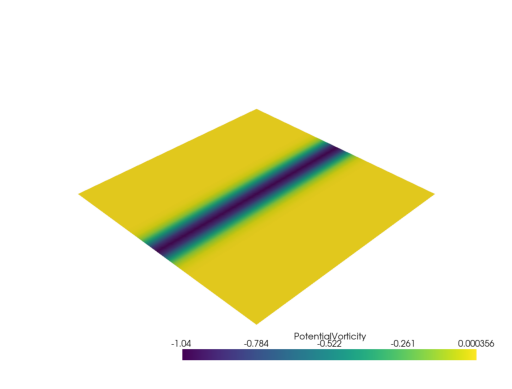

In [47]:
output_visual_name = "output/strsw_test_visual"
save_name = "vorticity_anim"
scalar = "PotentialVorticity"

import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

filepaths = []
for i in sorted(os.listdir(output_visual_name)):
    if ".vtu" in i:
        filepaths.append(f"{output_visual_name}/{i}")
pv.OFF_SCREEN = True


images = []  # will store arrays for Matplotlib

for fp in filepaths:
    mesh = pv.read(fp)

    plotter = pv.Plotter(off_screen=True)
    if scalar is not None:
        plotter.add_mesh(mesh, scalars="PotentialVorticity", cmap="viridis")
    else:
        plotter.add_mesh(mesh, cmap="viridis")

    plotter.camera_position = "iso"
    
    # Returns an RGBA numpy array
    img = plotter.screenshot(return_img=True)
    images.append(img)

    plotter.close()


fig, ax = plt.subplots()
im = ax.imshow(images[0])
ax.axis("off")

def update(i):
    im.set_array(images[i])
    return [im]

anim = FuncAnimation(fig, update, frames=len(images), interval=200)

anim.save(f"{output_visual_name}/{save_name}.mp4", fps=5, dpi=150)



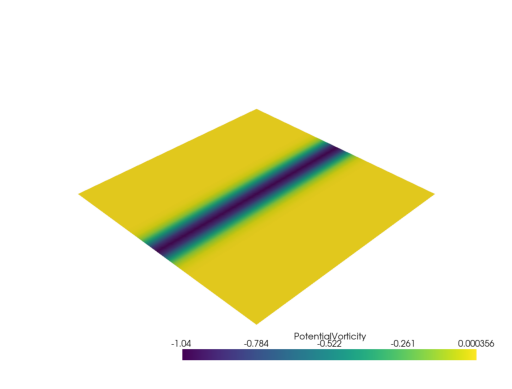